In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bureau = pd.read_csv("C:/final/home-credit-default-risk/bureau.csv")

In [3]:
bureau.head(30)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.000,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.000,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.50,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.00,0,180000.00,71017.380,108982.620,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.00,0,42103.80,42103.800,0.000,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.00,0,76878.45,0.000,0.000,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.00,0,103007.70,0.000,0.000,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.00,0,4500.00,0.000,0.000,0.0,Credit card,-690,NaN


In [4]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [5]:
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [6]:
bureau.isna().sum()/bureau.shape[0] # 約定每年還款金額&最大欠款額NA比例很高

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [7]:
bureau.groupby('CREDIT_ACTIVE')['CREDIT_DAY_OVERDUE'].describe().sort_index(by='count',ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
CREDIT_ACTIVE,,,,,,,,
Closed,1079273.0,0.104681,12.932319,0.0,0.0,0.0,0.0,2347.0
Active,630607.0,1.810288,53.478929,0.0,0.0,0.0,0.0,2770.0
Sold,6527.0,21.936418,213.269464,0.0,0.0,0.0,0.0,2792.0
Bad debt,21.0,313.619048,513.969209,0.0,0.0,0.0,366.0,1761.0


In [8]:
bureau.loc[bureau['CREDIT_DAY_OVERDUE']!=0] # 逾期天數不等於0的有4217筆

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
365,282297,5714943,Active,currency 1,-2712,2603,-2498.0,NaN,4590.0,0,24696.000,231.525,0.0,231.525,Consumer credit,-1077,NaN
785,408647,5715468,Active,currency 1,-313,6,233.0,NaN,NaN,0,417208.500,214947.000,0.0,288.000,Consumer credit,-5,NaN
936,380677,5715645,Active,currency 1,-2659,30,-2353.0,NaN,NaN,0,57024.000,0.000,NaN,58.500,Consumer credit,-493,NaN
1575,218135,5716400,Active,currency 1,-2543,2156,-2172.0,NaN,NaN,0,45000.000,NaN,NaN,504.000,Consumer credit,-2156,NaN
1791,229323,5716671,Active,currency 1,-757,496,NaN,NaN,NaN,0,225000.000,NaN,NaN,169582.500,Consumer credit,-4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707319,226956,5027625,Active,currency 1,-52,19,224.0,NaN,2151.0,0,23701.500,18819.000,0.0,22.500,Consumer credit,-18,NaN
1707833,108883,5028638,Active,currency 1,-907,20,553.0,NaN,NaN,0,135000.000,137119.500,NaN,193.500,Credit card,-13,0.0
1709570,141935,5582069,Active,currency 1,-80,20,1016.0,NaN,22.5,0,166137.255,160812.000,0.0,22.500,Consumer credit,-11,NaN
1709789,385777,5582323,Active,currency 1,-126,24,606.0,NaN,NaN,0,405000.000,362002.500,0.0,22.500,Consumer credit,-9,NaN


In [9]:
bureau.loc[(bureau['CREDIT_DAY_OVERDUE']!=0) & (bureau['CREDIT_ACTIVE']=='Closed')] # 已經Closed的還有逾期天數？

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
9446,350002,5725982,Closed,currency 1,-2276,1715,-1972.0,-1724.0,NaN,0,16186.5,0.0,0.0,585.0,Consumer credit,-1714,NaN
17100,323596,5190659,Closed,currency 1,-2261,1572,-1957.0,-1575.0,NaN,0,113094.0,0.0,0.0,220.5,Consumer credit,-1571,NaN
43881,392205,5214368,Closed,currency 1,-2591,1694,-2103.0,-1699.0,NaN,0,26995.5,0.0,0.0,9.0,Consumer credit,-1693,NaN
46064,247863,5217154,Closed,currency 1,-2355,1651,-2051.0,-1656.0,NaN,0,16929.0,0.0,0.0,54.0,Consumer credit,-1650,NaN
50560,233380,5222730,Closed,currency 1,-2349,745,-1254.0,-887.0,NaN,0,249300.0,0.0,0.0,9.0,Consumer credit,-744,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600459,454392,5335298,Closed,currency 1,-2103,1918,-1921.0,-1251.0,NaN,0,27783.0,0.0,0.0,58.5,Consumer credit,-1248,NaN
1628047,381777,5567059,Closed,currency 1,-2669,2347,-2487.0,-2109.0,NaN,0,38898.0,0.0,0.0,36.0,Consumer credit,-428,0.0
1641060,329467,5550615,Closed,currency 1,-1561,1278,-1255.0,-1261.0,NaN,0,36031.5,0.0,0.0,0.0,Consumer credit,-1254,NaN
1659270,433302,6644337,Closed,currency 1,-1397,1272,-1275.0,-1262.0,NaN,0,78300.0,0.0,0.0,0.0,Consumer credit,-1256,NaN


In [10]:
bureau.loc[bureau['SK_ID_CURR']==282297] # 試著解釋一個人的狀況

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
365,282297,5714943,Active,currency 1,-2712,2603,-2498.0,NaN,4590.0,0,24696.0,231.525,0.000,231.525,Consumer credit,-1077,NaN
366,282297,5714944,Closed,currency 1,-789,0,-424.0,-516.0,NaN,0,139860.0,0.000,0.000,0.000,Consumer credit,-513,NaN
367,282297,5714945,Closed,currency 1,-907,0,-542.0,-532.0,NaN,0,450000.0,0.000,0.000,0.000,Consumer credit,-513,NaN
368,282297,5714947,Active,currency 1,-419,0,886.0,NaN,NaN,0,112500.0,78016.500,0.000,0.000,Credit card,-67,NaN
369,282297,5714948,Active,currency 1,-158,0,573.0,NaN,NaN,0,466200.0,435573.000,0.000,0.000,Consumer credit,-67,NaN
370,282297,5714952,Active,currency 1,-2614,0,-1899.0,NaN,0.0,0,225000.0,0.000,59083.785,0.000,Credit card,-2187,NaN
371,282297,5714953,Active,currency 1,-1797,0,-1053.0,NaN,0.0,0,225000.0,115592.400,0.000,0.000,Credit card,-1424,NaN
372,282297,5714954,Closed,currency 1,-49,0,316.0,-39.0,0.0,0,650335.5,NaN,NaN,0.000,Car loan,-39,NaN
1672029,282297,5714946,Closed,currency 1,-1524,0,-793.0,-791.0,NaN,0,935640.0,0.000,0.000,0.000,Consumer credit,-706,NaN
1672030,282297,5714950,Closed,currency 1,-1298,0,-934.0,-875.0,NaN,0,232258.5,NaN,NaN,0.000,Consumer credit,-872,NaN


In [11]:
(bureau['DAYS_CREDIT']-bureau['CREDIT_DAY_OVERDUE']).dropna()

0          -497
1          -208
2          -203
3          -203
4          -629
           ... 
1716423     -44
1716424   -2648
1716425   -1809
1716426   -1878
1716427    -463
Length: 1716428, dtype: int64

In [12]:
((bureau['DAYS_CREDIT']-bureau['CREDIT_DAY_OVERDUE']).dropna()<=0).sum()/1716428 # 檢查是否逾期天數皆小於DAYS_CREDIT

1.0

In [13]:
bureau.loc[(bureau['CREDIT_ACTIVE']=='Active') & (bureau['DAYS_CREDIT_ENDDATE']<0)] # EndDate意義不明，跟CREDIT_ACTIVE似乎沒有關係
# 從DAYS_CREDIT_ENDDATE看已經結束的貸款，狀態還是Active？

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.0,0.0,0.0,0.0,Credit card,-690,NaN
10,162297,5714472,Active,currency 1,-1146,0,-180.0,NaN,0.0,0,337500.0,0.0,0.0,0.0,Credit card,-690,NaN
34,400486,5714506,Active,currency 1,-941,0,-17.0,NaN,NaN,0,40500.0,0.0,0.0,0.0,Credit card,-15,NaN
50,452585,5714525,Active,currency 1,-2538,0,-1427.0,NaN,0.0,0,45000.0,0.0,0.0,0.0,Credit card,-682,NaN
51,452585,5714527,Active,currency 1,-42,0,-26.0,NaN,NaN,0,45000.0,54000.0,0.0,0.0,Consumer credit,-31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716240,233665,5051918,Active,currency 1,-646,0,-281.0,NaN,NaN,0,67500.0,6205.5,0.0,0.0,Consumer credit,-277,NaN
1716268,391091,5053479,Active,currency 1,-2361,0,-1247.0,NaN,NaN,0,0.0,171.0,0.0,0.0,Credit card,-1025,NaN
1716284,435426,5053674,Active,currency 1,-1228,0,-121.0,NaN,NaN,0,270000.0,264087.0,0.0,0.0,Credit card,-82,NaN
1716326,229234,5055272,Active,currency 1,-696,0,-331.0,NaN,NaN,0,675000.0,292725.0,0.0,0.0,Consumer credit,-431,NaN


In [14]:
bureau.groupby('CREDIT_ACTIVE')['DAYS_ENDDATE_FACT'].describe() 
# Active的count跟上表不一樣？
## 依說明文件，'DAYS_ENDDATE_FACT'(貸款已結束幾天)應只有在Closed的狀況下有值，建議將Active狀態下的此欄都改為na(數目不多)

,count,mean,std,min,25%,50%,75%,max
CREDIT_ACTIVE,,,,,,,,
Active,1969.0,-1344.955815,990.683275,-2922.0,-2395.0,-1306.0,-80.00,-3.0
Bad debt,10.0,-1211.900000,471.153301,-1781.0,-1538.0,-1458.5,-781.75,-499.0
Closed,1079148.0,-1017.406828,713.229580,-42023.0,-1488.0,-897.0,-426.00,0.0
Sold,1648.0,-644.797937,641.664422,-2682.0,-1077.0,-327.0,-124.75,-5.0


In [28]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [14]:
(bureau['DAYS_CREDIT']-bureau['DAYS_CREDIT_ENDDATE']).dropna()

0           -344.0
1          -1283.0
2           -731.0
4          -1826.0
5         -27733.0
            ...   
1716422   -33777.0
1716423      -14.0
1716424     -215.0
1716425     -181.0
1716426     -365.0
Length: 1610875, dtype: float64

In [15]:
((bureau['DAYS_CREDIT']-bureau['DAYS_CREDIT_ENDDATE']).dropna()<=0).sum()/1610875
 # 檢查貸款結束天數與DAYS_CREDIT的關係。DAYS_CREDIT為CB貸款的開始日，應該都要比DAYS_CREDIT_ENDDATE(CB貸款結束日來得小)

0.9998981919764104

In [16]:
bureau.loc[(bureau['DAYS_CREDIT'])>(bureau['DAYS_CREDIT_ENDDATE'])] # 檢查貸款結束天數與DAYS_CREDIT的關係，異常狀況，大小的關係很怪；如要使用DAYS_CREDIT_ENDDATE，建議將這幾筆刪除

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
55561,324038,5233073,Active,currency 1,-841,0,-16322.0,NaN,0.00,0,0.0,264909.240,0.0,0.0,Credit card,-39,NaN
63031,273313,5001845,Active,currency 1,0,0,-222.0,NaN,NaN,0,5760553.5,0.000,NaN,0.0,Another type of loan,-86,NaN
67507,147912,5007091,Active,currency 1,-388,0,-41847.0,NaN,0.00,0,225000.0,0.000,225000.0,0.0,Credit card,-241,NaN
98826,200629,6540711,Closed,currency 1,-2317,0,-41824.0,-428.0,8271.99,0,0.0,0.000,0.0,0.0,Credit card,-428,NaN
106353,120334,6585564,Closed,currency 1,-2579,0,-41836.0,-687.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595661,437755,5596368,Active,currency 1,-2697,0,-16295.0,NaN,0.00,0,0.0,171183.600,0.0,0.0,Credit card,-12,NaN
1663955,141706,6649929,Closed,currency 1,-2783,0,-41823.0,-674.0,0.00,0,0.0,0.000,0.0,0.0,Credit card,-674,NaN
1667368,122988,5599599,Active,currency 1,-835,0,-16300.0,NaN,0.00,0,0.0,189031.725,0.0,0.0,Credit card,-17,NaN
1684396,293428,5571289,Closed,currency 1,-2252,0,-41846.0,-457.0,10323.36,0,0.0,0.000,0.0,0.0,Credit card,-457,NaN


In [76]:
bureau.loc[(bureau['AMT_CREDIT_SUM_DEBT']==0) & (bureau['CREDIT_ACTIVE']=='Active')]
# 負債欄位意義不明，無負債應該貸款就會Close

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.0,0.0,0.0,0.0,Credit card,-690,NaN
10,162297,5714472,Active,currency 1,-1146,0,-180.0,NaN,0.0,0,337500.0,0.0,0.0,0.0,Credit card,-690,NaN
22,222183,5714492,Active,currency 1,-774,0,625.0,NaN,NaN,0,127840.5,0.0,0.0,0.0,Credit card,-210,NaN
31,136226,5714502,Active,currency 1,-521,0,551.0,NaN,NaN,0,112500.0,0.0,0.0,0.0,Credit card,-30,NaN
34,400486,5714506,Active,currency 1,-941,0,-17.0,NaN,NaN,0,40500.0,0.0,0.0,0.0,Credit card,-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716367,174236,5057234,Active,currency 1,-559,0,1269.0,NaN,0.0,0,225000.0,0.0,0.0,0.0,Credit card,-559,NaN
1716373,207024,5057311,Active,currency 1,-497,0,1330.0,NaN,0.0,0,135000.0,0.0,0.0,0.0,Credit card,-497,NaN
1716383,195589,5057399,Active,currency 1,-679,0,416.0,NaN,0.0,0,337500.0,0.0,337500.0,0.0,Credit card,-218,NaN
1716395,181001,5057523,Active,currency 1,-112,0,1056.0,NaN,NaN,0,418500.0,0.0,0.0,0.0,Credit card,-39,NaN


In [19]:
bureau.loc[(bureau['AMT_CREDIT_SUM_DEBT']>0)]['SK_ID_CURR'].unique().shape # 多數人都有負債

(215542,)

In [20]:
bureau.loc[(bureau['AMT_CREDIT_SUM_OVERDUE']!=0) & (bureau['CREDIT_ACTIVE']=='Closed'),
           ('CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','DAYS_CREDIT_ENDDATE','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_OVERDUE')] # 有錢還沒還，但已經Closed是怎麼回事

,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_OVERDUE
9446,Closed,1715,-1972.0,NaN,585.0
17100,Closed,1572,-1957.0,NaN,220.5
33723,Closed,0,-87.0,NaN,9.0
43881,Closed,1694,-2103.0,NaN,9.0
46064,Closed,1651,-2051.0,NaN,54.0
...,...,...,...,...,...
1628047,Closed,2347,-2487.0,NaN,36.0
1655616,Closed,0,-1961.0,NaN,4.5
1679083,Closed,2220,-2124.0,NaN,63949.5
1696803,Closed,0,-444.0,NaN,76.5


In [21]:
bureau['AMT_CREDIT_SUM_LIMIT'].describe()  # 34%的信用卡額度為na，同一人可以有值的信用卡額度平均作為代表

count    1.124648e+06
mean     6.229515e+03
std      4.503203e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

In [45]:
bureau.loc[(bureau['AMT_CREDIT_SUM_LIMIT']>0) & (bureau['CREDIT_TYPE']!='Credit card')].shape[0] # 有信用卡額度數字的紀錄中，36筆的貸款非信用卡

36

In [46]:
bureau.loc[(bureau['AMT_CREDIT_SUM_LIMIT']>0) & (bureau['CREDIT_TYPE']=='Credit card')].shape[0] # 有信用卡額度數字的紀錄中，大部分的貸款為信用卡

74119

In [47]:
bureau.loc[(bureau['CREDIT_TYPE']=='Credit card')].shape[0] # 信用卡貸款共402195筆

402195

In [22]:
bureau[0:1] # 看有什麼欄位

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN


In [23]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [24]:
bureau['CREDIT_ACTIVE'].unique().shape

(4,)

In [48]:
for name in bureau.columns:
    print('\n')
    print(f'{name}欄')
    if np.dtype(bureau[name])=='O' :
        print(bureau[name].unique())
    print(bureau[name].unique().shape)
    



SK_ID_CURR欄
(305811,)


SK_ID_BUREAU欄
(1716428,)


CREDIT_ACTIVE欄
['Closed' 'Active' 'Sold' 'Bad debt']
(4,)


CREDIT_CURRENCY欄
['currency 1' 'currency 2' 'currency 4' 'currency 3']
(4,)


DAYS_CREDIT欄
(2923,)


CREDIT_DAY_OVERDUE欄
(942,)


DAYS_CREDIT_ENDDATE欄
(14097,)


DAYS_ENDDATE_FACT欄
(2918,)


AMT_CREDIT_MAX_OVERDUE欄
(68252,)


CNT_CREDIT_PROLONG欄
(10,)


AMT_CREDIT_SUM欄
(236709,)


AMT_CREDIT_SUM_DEBT欄
(226538,)


AMT_CREDIT_SUM_LIMIT欄
(51727,)


AMT_CREDIT_SUM_OVERDUE欄
(1616,)


CREDIT_TYPE欄
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
(15,)


DAYS_CREDIT_UPDATE欄
(2982,)


AMT_ANNUITY欄
(40322,)


In [26]:
bureau['CNT_CREDIT_PROLONG'].unique()

array([0, 2, 1, 4, 3, 5, 9, 8, 6, 7], dtype=int64)

In [16]:
assert bureau.apply(lambda x: x.unique().shape[0])['SK_ID_BUREAU'] == bureau.shape[0] # 確認是否每列SK_ID_BUREAU都不同

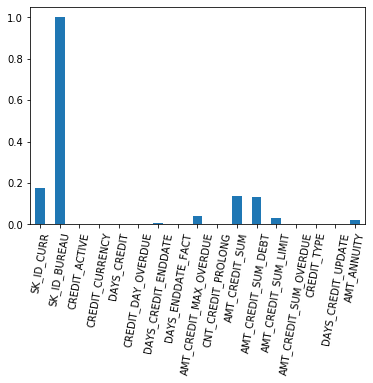

In [27]:
(bureau.apply(lambda x: x.unique().shape[0])/bureau.shape[0]).plot(kind='bar',rot=80)

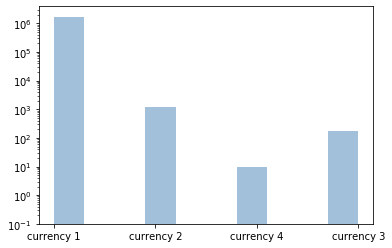

In [58]:
plt.hist(bureau['CREDIT_CURRENCY'], alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True,);

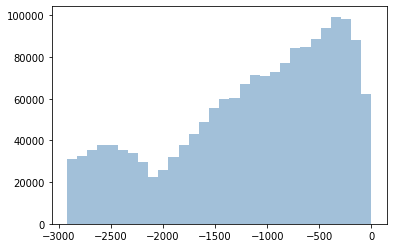

In [28]:
plt.hist(bureau['DAYS_CREDIT'], bins=30, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none');

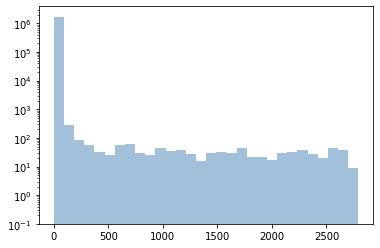

In [29]:
plt.hist(bureau['CREDIT_DAY_OVERDUE'], bins=30, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True); 

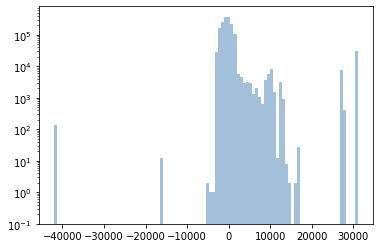

In [69]:
plt.hist(bureau['DAYS_CREDIT_ENDDATE'], bins=100, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True); 

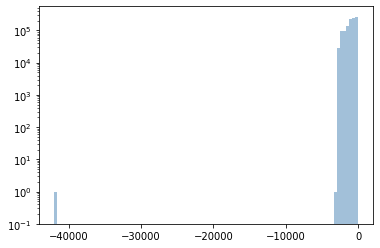

In [68]:
plt.hist(bureau['DAYS_ENDDATE_FACT'], bins=100, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True); 

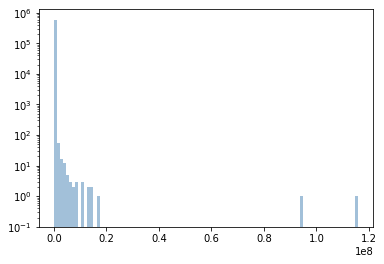

In [70]:
plt.hist(bureau['AMT_CREDIT_MAX_OVERDUE'], bins=100, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True); 

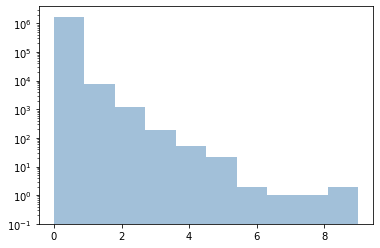

In [49]:
plt.hist(bureau['CNT_CREDIT_PROLONG'], alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True); 

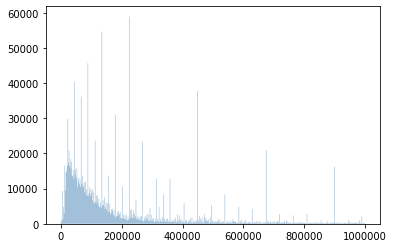

In [50]:
plt.hist(bureau['AMT_CREDIT_SUM'], bins=500, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',range=(1,1000000)); # 似乎有異常值

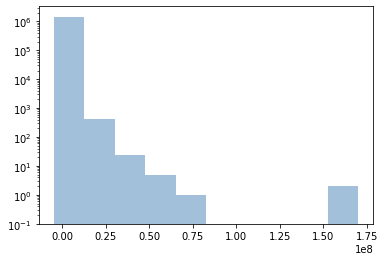

In [51]:
plt.hist(bureau['AMT_CREDIT_SUM_DEBT'], alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True);

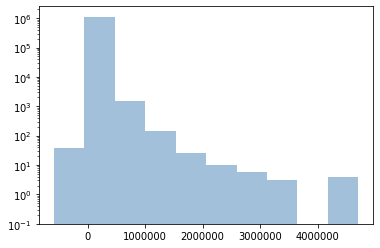

In [53]:
plt.hist(bureau['AMT_CREDIT_SUM_LIMIT'], alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True);

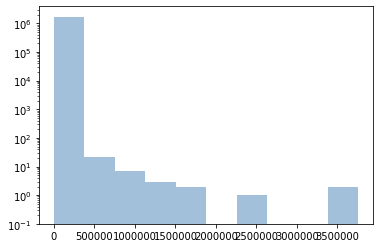

In [54]:
plt.hist(bureau['AMT_CREDIT_SUM_OVERDUE'], alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True);

C:\Users\YEN32\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


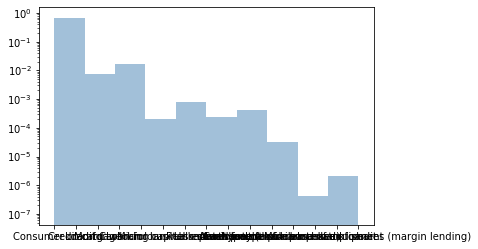

In [35]:
plt.hist(bureau['CREDIT_TYPE'], normed=True, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True,);

In [36]:
bureau.groupby('CREDIT_TYPE')['CREDIT_TYPE'].describe().sort_index(by='count',ascending=False)

C:\Users\YEN32\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,count,unique,top,freq
CREDIT_TYPE,,,,
Consumer credit,1251615,1,Consumer credit,1251615
Credit card,402195,1,Credit card,402195
Car loan,27690,1,Car loan,27690
Mortgage,18391,1,Mortgage,18391
Microloan,12413,1,Microloan,12413
Loan for business development,1975,1,Loan for business development,1975
Another type of loan,1017,1,Another type of loan,1017
Unknown type of loan,555,1,Unknown type of loan,555
Loan for working capital replenishment,469,1,Loan for working capital replenishment,469


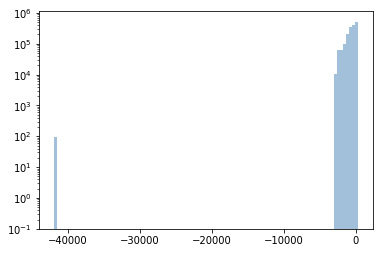

In [55]:
plt.hist(bureau['DAYS_CREDIT_UPDATE'], bins=100,  alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True,);

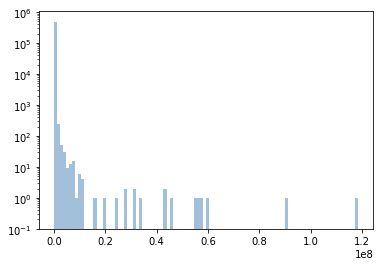

In [56]:
plt.hist(bureau['AMT_ANNUITY'], bins=100, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none',log=True,);

建議主表新增欄位
1. Active貸款金額
2. Active貸款金額的逾期金額比重
3. 平均信貸延長幾次
4. 信貸金額除以信用卡額度的平均
5. Active貸款金額與現在貸款金額的比例
6. 平均逾期天數
7. 最大逾期天數
8. 最近申請其他貸款的時間
9. 申請貸款時間的第一四分位數